## APP setting

/home/pgonzalez/miniconda3/envs/histnet/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/pgonzalez/miniconda3/envs/histnet/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


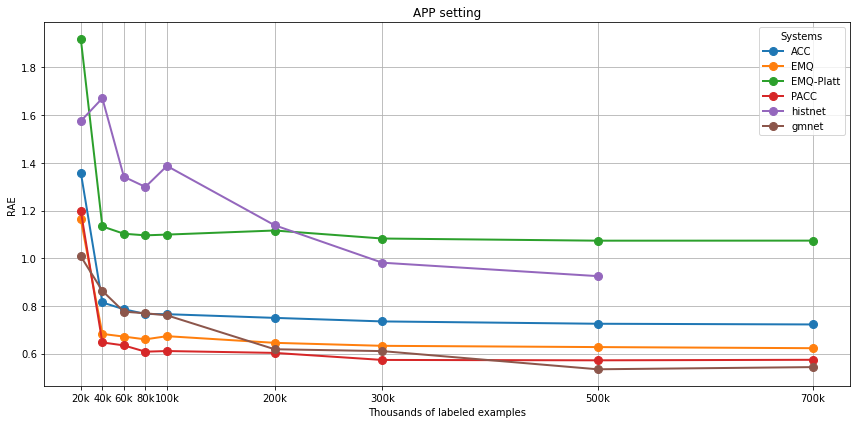

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

trad_systems = ['ACC','EMQ','EMQ-Platt','PACC']
deep_systems = ['histnet','gmnet']
labels = [20000,40000,60000,80000,100000,200000,300000,500000,700000]

df = pd.DataFrame(columns=trad_systems+deep_systems, index=labels)

for s in (trad_systems+deep_systems):
    for l in labels:
        if s in trad_systems:
            path = 'results/'+s+'_'+str(l)+'_errors.txt'
        else:
            path = 'results/'+s+'_app'+'_'+str(l)+'_errors.txt'
        if os.path.exists(path):
            r = pd.read_csv(path)
            r = r.describe()['RAE']['mean']
            df.loc[l, s] = r

plt.figure(figsize=(12, 6)) 
df.plot(kind='line', marker='o',linewidth=2, markersize=8, xticks=df.index,ax=plt.gca())
plt.title('APP setting')
plt.gca().set_xticks(df.index)
plt.gca().set_xticklabels([f"{int(x/1000)}k" for x in df.index])
plt.xlabel('Thousands of labeled examples')
plt.ylabel('RAE')
plt.grid(True)
plt.legend(title='Systems')
plt.tight_layout()

# Show the plot
plt.show()


## U setting

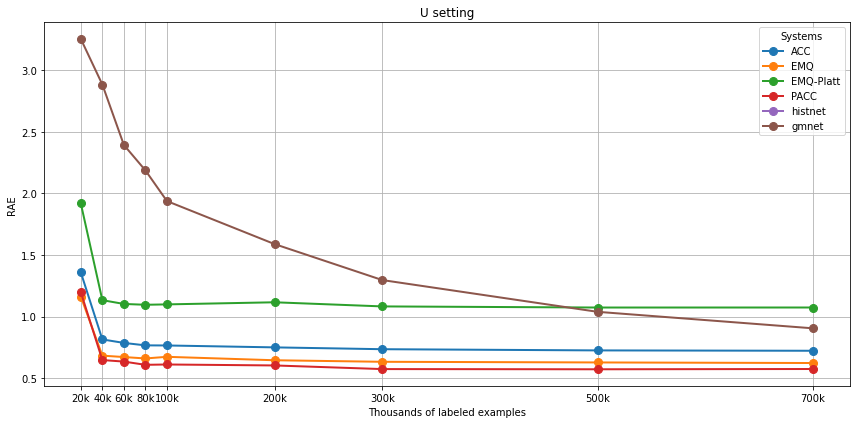

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

trad_systems = ['ACC','EMQ','EMQ-Platt','PACC']
deep_systems = ['histnet','gmnet']
labels = [20000,40000,60000,80000,100000,200000,300000,500000,700000]

df = pd.DataFrame(columns=trad_systems+deep_systems, index=labels)

for s in (trad_systems+deep_systems):
    for l in labels:
        if s in trad_systems:
            path = 'results/'+s+'_'+str(l)+'_errors.txt'
        else:
            path = 'results/'+s+'_u'+'_'+str(l)+'_errors.txt'
        if os.path.exists(path):
            r = pd.read_csv(path)
            r = r.describe()['RAE']['mean']
            df.loc[l, s] = r

plt.figure(figsize=(12, 6)) 
df.plot(kind='line', marker='o',linewidth=2, markersize=8, xticks=df.index,ax=plt.gca())
plt.title('U setting')
plt.gca().set_xticks(df.index)
plt.gca().set_xticklabels([f"{int(x/1000)}k" for x in df.index])
plt.xlabel('Thousands of labeled examples')
plt.ylabel('RAE')
plt.grid(True)
plt.legend(title='Systems')
plt.tight_layout()

# Show the plot
plt.show()


# APP+U setting

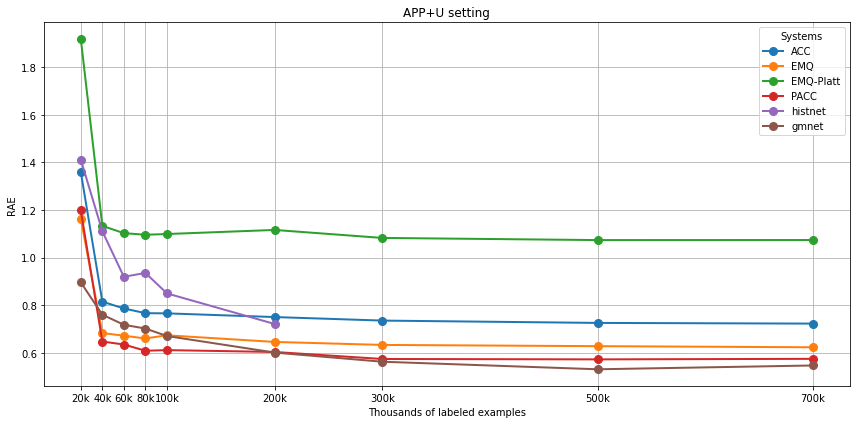

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

trad_systems = ['ACC','EMQ','EMQ-Platt','PACC']
deep_systems = ['histnet','gmnet']
labels = [20000,40000,60000,80000,100000,200000,300000,500000,700000]

df = pd.DataFrame(columns=trad_systems+deep_systems, index=labels)

for s in (trad_systems+deep_systems):
    for l in labels:
        if s in trad_systems:
            path = 'results/'+s+'_'+str(l)+'_errors.txt'
        else:
            path = 'results/'+s+'_app_u'+'_'+str(l)+'_errors.txt'
        if os.path.exists(path):
            r = pd.read_csv(path)
            r = r.describe()['RAE']['mean']
            df.loc[l, s] = r

plt.figure(figsize=(12, 6)) 
df.plot(kind='line', marker='o',linewidth=2, markersize=8, xticks=df.index,ax=plt.gca())
plt.title('APP+U setting')
plt.gca().set_xticks(df.index)
plt.gca().set_xticklabels([f"{int(x/1000)}k" for x in df.index])
plt.xlabel('Thousands of labeled examples')
plt.ylabel('RAE')
plt.grid(True)
plt.legend(title='Systems')
plt.tight_layout()

# Show the plot
plt.show()


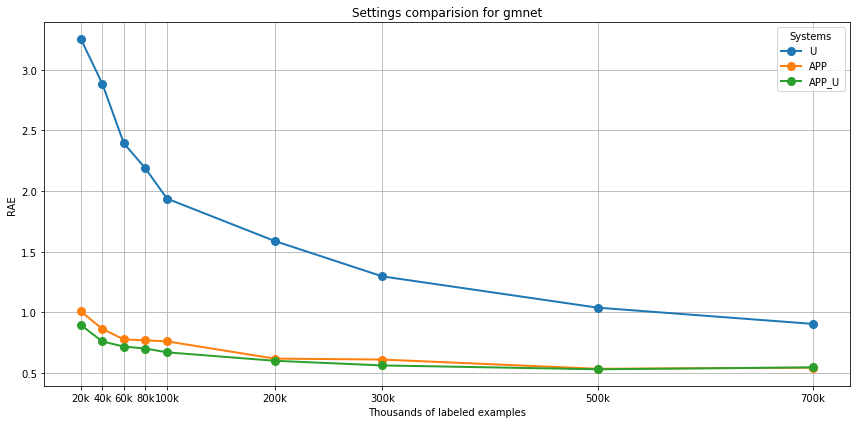

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

system='gmnet'
settings=['U','APP','APP_U']
labels = [20000,40000,60000,80000,100000,200000,300000,500000,700000]

df = pd.DataFrame(columns=settings, index=labels)

for s in settings:
    for l in labels:
        path = 'results/'+system+'_'+s.lower()+'_'+str(l)+'_errors.txt'
        if os.path.exists(path):
            r = pd.read_csv(path)
            r = r.describe()['RAE']['mean']
            df.loc[l, s] = r

plt.figure(figsize=(12, 6)) 
df.plot(kind='line', marker='o',linewidth=2, markersize=8, xticks=df.index,ax=plt.gca())
plt.title('Settings comparision for '+system)
plt.gca().set_xticks(df.index)
plt.gca().set_xticklabels([f"{int(x/1000)}k" for x in df.index])
plt.xlabel('Thousands of labeled examples')
plt.ylabel('RAE')
plt.grid(True)
plt.legend(title='Systems')
plt.tight_layout()

# Show the plot
plt.show()


In [4]:
from dlquantification.utils.lossfunc import MRAE
import torch
base_path = 'results/predictions'
methods = ['ACC','CC','EMQ','EMQ-Platt','PACC','PCC']
labels = [20000,40000,60000,80000,100000,200000,300000,500000,700000]


loss_mrae = MRAE(eps=1.0 / (2 * 1000), n_classes=28)

prevalences = pd.read_csv('/media/nas/pgonzalez/lequa2024/T2/public/test_prevalences.txt')
for m in methods:
    for l in labels:
        results_errors = pd.DataFrame(columns=("RAE",), index=range(5000), dtype="float")
        path = base_path + '/' + m + '/task_2_' + str(l) + '.csv'
        p_hat = pd.read_csv(path)
        for i, row in p_hat.iterrows():
            results_errors.iloc[i] = loss_mrae(torch.FloatTensor(prevalences.iloc[i, 1:]), torch.FloatTensor(p_hat.iloc[i,1:])).numpy()
         
        results_errors.to_csv(os.path.join("results/", m + '_' + str(l)+ "_errors.txt"), index_label="id")




/tmp/ipykernel_1830394/1445703837.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results_errors.iloc[i] = loss_mrae(torch.FloatTensor(prevalences.iloc[i, 1:]), torch.FloatTensor(p_hat.iloc[i,1:])).numpy()
/tmp/ipykernel_1830394/1445703837.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results_errors.iloc[i] = loss_mrae(torch.FloatTensor(prevalences.iloc[i, 1:]), torch.FloatTensor(p_hat.iloc[i,1:])).numpy()
/tmp/ipykernel_1830394/1445703837.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D